**Marissa Hermsen**  
**CSE160 Project Part II: Analysis and Results**
 
**`Analysis of UW Course Grade Distribution 2011-2016`**

### Summary:
> My research project will analyze the grades received by UW students in every offered course over a 5 year period. The dataset I am using provides course numbers, instructor, student count, number of students who received letter grade A-F & W, and the average GPA. This data is available as public record and released as part of a FOIA request in April 2016.   

### Research Questions:
`1) Is there a correlation between larger classes and lower grades?`   
`2) Which department awarded the most As and which had the most Fs?`  
`3) What is the ranking of instructors based on grades?`  
`4) Which level of courses (100-500) has the narrowest grade distribution?`  

### Motivation
* Motivation for this project comes from personal experience in finding overcrowded classes to be more difficult to excel in. Many students use `ratemyprofessor.com` to read opinions on prospective teachers, so I think that having access to a legitimate record of grades will provide a more trustworthy measure in which to help make their course decisions. 

### Datasets:

* Data is downloadable [here](https://www.dropbox.com/sh/0sl53t0ija2l5sc/AABa-CP5oHoBxtqTZyBVOVj-a?dl=0) through dropbox.  
It is part of a [large collection](https://docs.google.com/spreadsheets/d/1jPKV7YmXYSUWG9GeP41rAr64X3UjtzSRHiiUGAjCMAc/edit#gid=0) of public university records obtained by FOIA requests.

Files are also stored in a [Github repo](https://github.com/MarissaUW/CS160)

> Import libraries and data file

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

pd.set_option('display.max_column', 999)
pd.set_option('display.max_row', 999)
df = pd.read_csv('UW_Grades.csv', index_col = 0, sep = ',')
df = df.fillna(0)

## Methodology (algorithm or analysis)

### Q1: Class size/GPA correlation
>First I isolated class size and average GPA data using the following code:    

In [4]:
df1 = df.loc[:,['Student_Count', 'Average_GPA']]

> To avoid overplotting, I binned values into intervals

In [5]:
bins = [12, 25, 50, 75, 100, 150, 250, 730]
labels = ['under 25', '25-50', '50-75', '75-100', '100-150', '150-250', '250-730']
groups = pd.cut(df1.Student_Count, bins, labels = labels)
df1['count_group'] = groups
df1.count_group.value_counts()

under 25    18176
25-50       12664
50-75        3649
75-100       1670
100-150      1314
150-250      1171
250-730       598
Name: count_group, dtype: int64

>Next, I reset the index and dropped the old index

In [6]:
df1.reset_index(drop = True)

,Student_Count,Average_GPA,count_group
0,25,3.9,under 25
1,186,3.0,150-250
2,57,3.2,50-75
3,57,3.2,50-75
4,57,3.3,50-75
5,19,3.3,under 25
6,28,3.1,25-50
7,24,3.4,under 25
8,47,3.4,25-50
9,29,3.3,25-50


>Then I calculated the mean GPA per bin

In [7]:
count_mean = df1['Average_GPA'].groupby(df1['count_group']).mean()
count_mean

count_group
under 25    3.505832
25-50       3.399171
50-75       3.373363
75-100      3.244371
100-150     3.131202
150-250     3.054910
250-730     2.968729
Name: Average_GPA, dtype: float64

>Lastly, I plotted regression line to graph

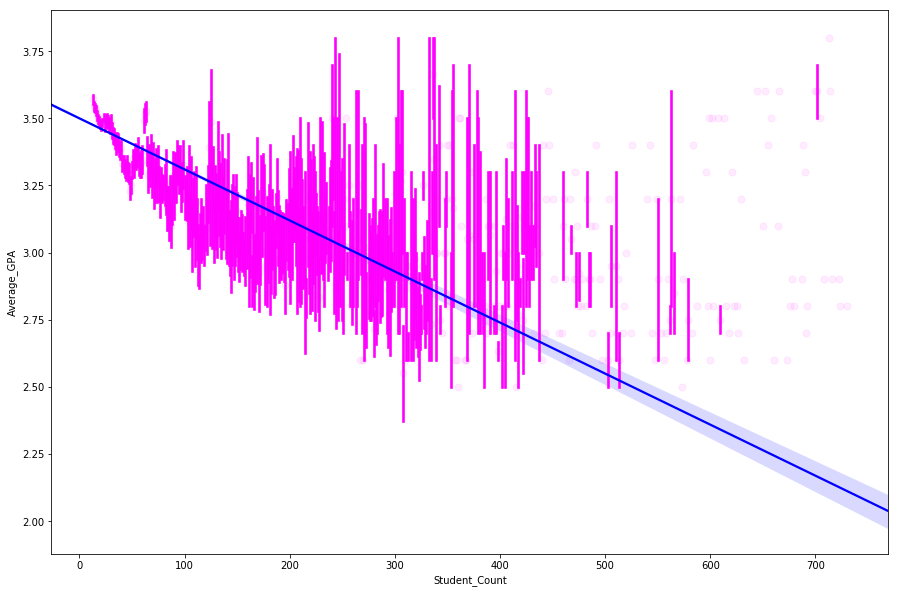

In [14]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x="Student_Count", y="Average_GPA", data=df1, x_estimator=np.mean, y_jitter=.6,
            scatter_kws={'alpha':0.07, 'color': 'magenta'}, line_kws={'color': 'blue'})

> Results show that there is a slight correlation between larger class size and lower average GPA

## Q2: Easiest degree/department

**2) Which department awarded the most As and which had the most Fs?**


> First I isolated the required data and removed the section letter from the course string 

In [15]:
df2 = df.loc[:, ('Term','Course_Number', 'Course_Title', 'Primary_Instructor',
       'Student_Count', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D',
       'D-', 'F', 'W', 'Average_GPA')]

> Next, I split the course_number column into separate lists and added columns displaying count of department courses in dataset and number of courses in that particular department

In [16]:
split = df2['Course_Number'].str.rsplit(" ", n=2, expand=True)
df2['course'] = split[0]
df2['num'] = split[1]
df2['sec'] = split[2]
df2["num"] = pd.to_numeric(df2["num"])
new = df2.Term.str.split(" ", n=1, expand=True)
df2['term1'] = new[0]
df2['term2'] = new[1]

> Then I merged the letter grade columns into single letter, filtered out the graduate level courses, and got a count of individual courses with same name

In [17]:
df2['A1'] = df2.apply(lambda x: x['A'] + x['A-'], axis=1)
df2['B1'] = df2.apply(lambda x: x['B+'] + x['B'] + x['B-'], axis=1)
df2['C1'] = df2.apply(lambda x: x['C+'] + x['C'] + x['C-'], axis=1)
df2['D1'] = df2.apply(lambda x: x['D+'] + x['D'] + x['D-'], axis=1)
df2 = df2[df2['num'] < 500]
df2['course_count'] = df2['course'].map(df2['course'].value_counts()).astype(int)

> I also split the Term column to use later

In [19]:
tsplit = df2.term2.str.split(' ', expand=True)
df2['qt'] = tsplit[0]
df2['yr'] = tsplit[1]
df2['qt'] = df2['qt'].str[1:]
df2['yr'] = df2['yr'].str[:-1]

> Data was then grouped by course and aggregated

In [21]:
df2a = df2.groupby(['yr', 'course'], as_index=True).agg({'Student_Count':'sum','A1':'sum','B1':'sum','C1':'sum','D1':'sum','F':'sum','W':'sum','Average_GPA':'mean'}) 

> Next I caluclated the percentage of students that received each letter grade, and append the data with the results. I also reset the index 

In [22]:
df2a['percent_A'] = df2a['A1'].div(df2a['Student_Count'])*100
D_F = df2a.D1.add(df2a.F, fill_value=0)
df2a['percent_DF'] = D_F.div(df2a['Student_Count'])*100
df2a['percent_W'] = df2a['W'].div(df2a['Student_Count'])*100
#df2a = df2a[df2a['Student_Count'] > 1000]
df2a = df2a.reset_index()

> Then I scaped the UW online [catalog webpage](https://www.washington.edu/students/crscat/) for course names, saved it as a cvs, and uploaded it to [my repo](https://github.com/MarissaUW/CS160).

> That data was then cleaned by splitting and renaming columns and merged into working dataset

In [26]:
df_UW = pd.read_csv('cat1.csv', index_col = 0, sep = ',')
df_UW = df_UW.fillna(0)
df_UW = df_UW.reset_index()
df_UW[['Course', 'Abbr']]= df_UW.Course.str.split('\(|\)', expand=True).iloc[:,[0,1]]
df_UW = df_UW.rename(columns={"Abbr":"courseab"})
df2a = df2a.rename(columns={"course":"courseab"})
df2b = pd.merge(df_UW, df2a, how='outer', on='courseab')

> Data was then put into a visualization

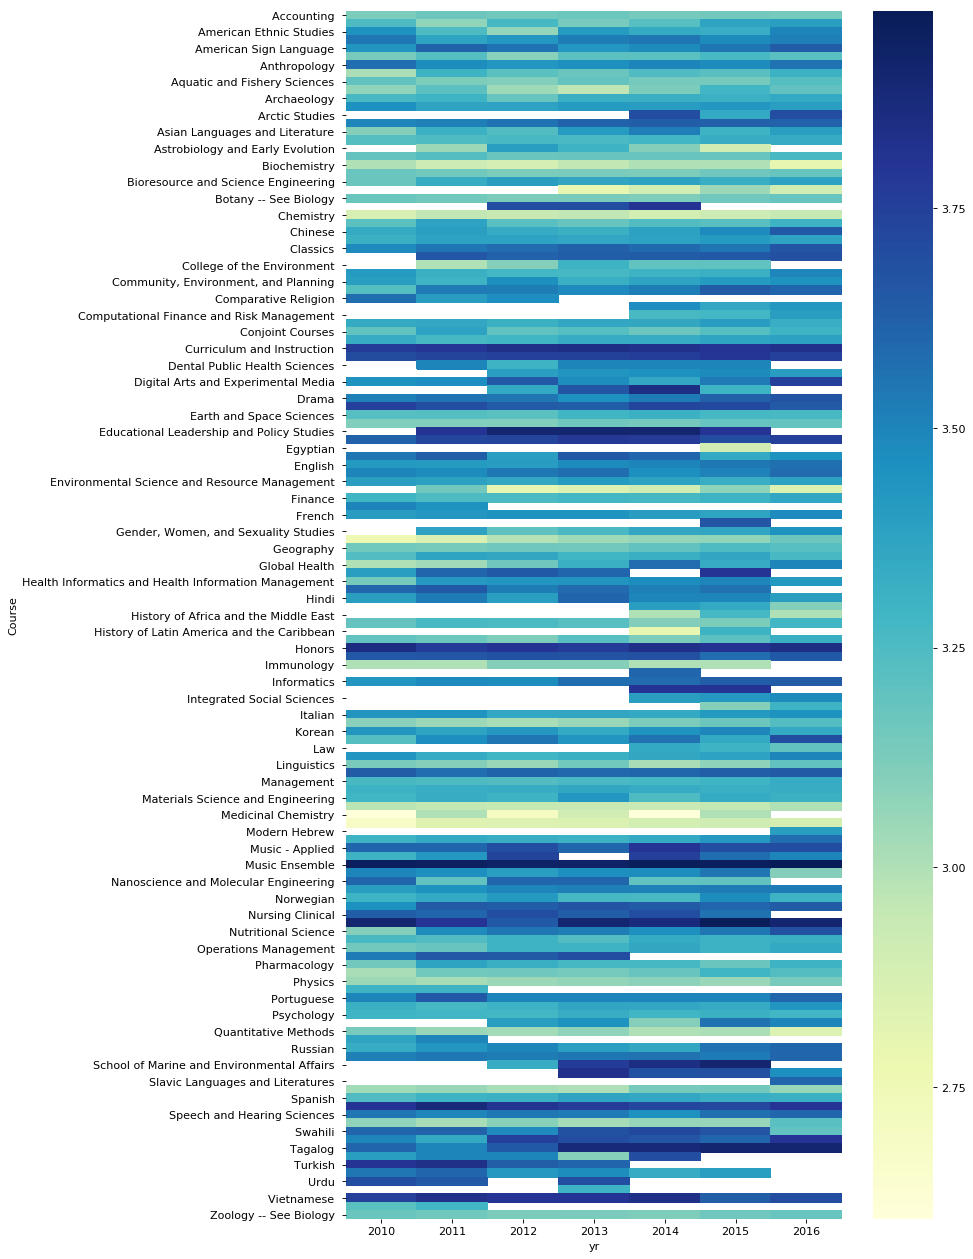

In [110]:
plt.figure(figsize=(10, 20), dpi=80)
p1 = df2b[['Course', 'yr','Average_GPA']]
heatmap2_data = pd.pivot_table(df2b,values='Average_GPA', index=['Course'], columns='yr')
heatmap2_data.head(n=5)
sns.heatmap(heatmap2_data, cmap="YlGnBu")

### Q3: Ranking Teachers

**What is the ranking of instructors based on grades?**
>First I isolated relevant data by grouping

In [111]:
df3 = df2.groupby(['course', 'Primary_Instructor'], as_index=True).agg({'Average_GPA':'mean', 'Student_Count':'sum'})
df3 = df3.reset_index()
df3 = df3.rename(columns={'course':'courseab'})
df3 = pd.merge(df_UW, df3, how='outer', on='courseab')

,School,Department,Course,courseab,Primary_Instructor,Average_GPA,Student_Count
0,College of Arts and Sciences,American Ethnic Studies,Afro-American Studies,AFRAM,"CHUDE-SOKEI, LOUIS ORT",3.000000,14.0
1,College of Arts and Sciences,American Ethnic Studies,Afro-American Studies,AFRAM,"DOBSON, JENNIFER",3.300000,15.0
2,College of Arts and Sciences,American Ethnic Studies,Afro-American Studies,AFRAM,"DOTSON, JEROME",2.800000,103.0
3,College of Arts and Sciences,American Ethnic Studies,Afro-American Studies,AFRAM,"IBRAHIM, HABIBA",3.120000,83.0
4,College of Arts and Sciences,American Ethnic Studies,Afro-American Studies,AFRAM,"JOHNSON, ERNEST B.",3.060000,166.0
5,College of Arts and Sciences,American Ethnic Studies,Afro-American Studies,AFRAM,"KIRK, BRIAN L.",3.900000,44.0
6,College of Arts and Sciences,American Ethnic Studies,Afro-American Studies,AFRAM,"PARKER, CHRISTOPHER S",3.000000,40.0
7,College of Arts and Sciences,American Ethnic Studies,Afro-American Studies,AFRAM,"PITTMAN, LASHAWNDA L.",3.050000,374.0
8,College of Arts and Sciences,American Ethnic Studies,Afro-American Studies,AFRAM,"RETMAN, SONNET H.",3.135294,690.0
9,College of Arts and Sciences,American Ethnic Studies,Afro-American Studies,AFRAM,"SCOTT, TERRY A.",3.557895,607.0


> Then I grouped the instructors by course, calculated the weighted mean GPA, taking into consideration the number of students graded, and filtered the top 3 in each course.

In [113]:
df3a = df3.groupby(['Course', 'Primary_Instructor'])
get_wavg = lambda g: np.average(g['Average_GPA'], weights=g['Student_Count'])
weighted_GPA = df3a.apply(get_wavg)
df3a = pd.DataFrame(weighted_GPA)
df3a = df3a.rename(columns={0:'GPA'})
df3a.reset_index()

,Course,Primary_Instructor,GPA
0,Accounting,"ADAMS, HELEN D.",3.033333
1,Accounting,"ANDERSON, KATHERINE, K",3.450000
2,Accounting,"ANTHONY, RYAN J",3.009091
3,Accounting,"BAESLER, WENDY G.",3.145000
4,Accounting,"BEE, SARAH M.",3.000000
5,Accounting,"BLACKBURNE, TERRENCE P",3.157143
6,Accounting,"CARNEY, KALEN J.",3.000000
7,Accounting,"CHEN, CIAO-WEI",3.300000
8,Accounting,"CURTIS, ASHER B",3.230000
9,Accounting,"DEMEK, KRISTINA C.",3.450000


In [114]:
df4 = df3a.groupby('Course', group_keys=False)\
                  .apply(pd.DataFrame.nsmallest,n=3,columns='GPA')
df4.reset_index()

,Course,Primary_Instructor,GPA
0,Accounting,"HODGE, FRANK",2.900000
1,Accounting,"DEMERJIAN, PETER R",2.933333
2,Accounting,"QUINN, PHIL",2.933333
3,Afro-American Studies,"DOTSON, JEROME",2.800000
4,Afro-American Studies,"STEPTOE, TYINA",2.950000
5,Afro-American Studies,"CHUDE-SOKEI, LOUIS ORT",3.000000
6,American Ethnic Studies,"PENA, DEVON G",2.800000
7,American Ethnic Studies,"FLORES, LAURO H.",3.000000
8,American Ethnic Studies,"PITTMAN, LASHAWNDA L.",3.033333
9,American Indian Studies,"REID, JOSHUA L",2.700000


### Q4: Grade Distribution by Course Level
**Is their correlation between course level and grades?**
> First the necessary data was isolated and split course number to group the grades by course level

In [104]:
df5 = df2.loc[:, ('course', 'num', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D',
       'D-', 'F', 'W', 'Student_Count')]
df5['num'] = df5['num'] // 100
df5 = df5.groupby(['num'])['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D',
       'D-', 'F', 'W', 'Student_Count'].sum().astype(int)

> Then I divided the grades by student count to return a percentage

In [91]:
df6 = df5[['A', 'A-', 'B+', 'B', 'B-', 'C','D','F']].div(df5.Student_Count, axis=0)*100

,A,A-,B+,B,B-,C,D,F
num,,,,,,,,
1,20.825163,24.472235,14.267812,11.238951,10.695232,3.589753,0.822425,1.714932
2,18.372447,27.270465,16.160798,12.235950,10.366830,3.102944,0.611245,1.297685
3,20.602102,29.699143,17.726504,11.741398,8.272773,2.362402,0.472674,1.094091
4,25.820948,32.614285,16.038248,9.578432,6.632387,1.860957,0.307459,0.855815


> I then plotted them using a heatmat

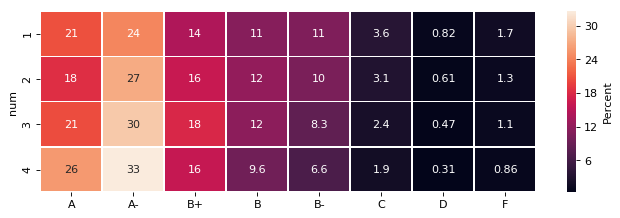

In [97]:
plt.figure(figsize=(10,3), dpi= 80)
ax = sns.heatmap(df6, linewidths=0.5, annot=True)
ax.collections[0].colorbar.set_label("Percent")